# Importing Needed Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

# Reading Cleaned Data

In [2]:
data = pd.read_csv("./cleanedDataPriceDr.csv")

In [3]:
# choosing 5000 readings as to facilitate data processesing so that it will not take too much time to train
data=data.sample(n=5000,random_state=1)
data.head()

,Unnamed: 0,Unnamed: 0.1,CentralAir-conditioning,Foundation,Condominium,Deck,DesignofHouse,Division,TypeofFinancing,FinishedBasement,...,FullBathrooms,HalfBathrooms,SaleDate,Weight,PrimarySpaceHeatingFuel,SalesPrice,SquareFootAreaofHouse,LotValue,SquareFootAreaofFinishedBasement,SquareFootAreaoftheLot
102737,152329,30725,1.0,3.0,2.0,2.0,1.0,9,1.0,0.0,...,3.0,1.0,200601,69,2.0,944200.0,4104.0,94000.0,0.0,8537.0
76709,109797,26495,1.0,3.0,2.0,2.0,1.0,7,1.0,0.0,...,3.0,0.0,200408,97,2.0,260000.0,2592.0,34000.0,0.0,9300.0
21378,29189,19016,1.0,2.0,2.0,1.0,1.0,5,5.0,0.0,...,2.0,0.0,200008,97,1.0,117900.0,1363.0,22000.0,0.0,43560.0
37388,51336,25807,1.0,3.0,2.0,2.0,1.0,7,2.0,0.0,...,2.0,0.0,200112,44,2.0,90000.0,1566.0,10000.0,0.0,22500.0
49266,68630,23716,1.0,3.0,2.0,2.0,1.0,7,2.0,0.0,...,2.0,1.0,200207,63,2.0,155500.0,2985.0,15000.0,0.0,10368.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 102737 to 149178
Data columns (total 32 columns):
Unnamed: 0                          5000 non-null int64
Unnamed: 0.1                        5000 non-null int64
CentralAir-conditioning             5000 non-null float64
Foundation                          5000 non-null float64
Condominium                         5000 non-null float64
Deck                                5000 non-null float64
DesignofHouse                       5000 non-null float64
Division                            5000 non-null int64
TypeofFinancing                     5000 non-null float64
FinishedBasement                    5000 non-null float64
ParkingFacility                     5000 non-null float64
PrimarySpaceHeatingSystem           5000 non-null float64
MetropolitanArea                    5000 non-null int64
ConstructionMethod                  5000 non-null float64
Patio                               5000 non-null float64
Porch                   

In [5]:
#dropping unecessary variables
data=data.iloc[:,2:]

# Data Preprocessing

## Feature Selection based on Correlation

In [6]:
#dropping the response variable: SalesPrice so that to include only the independent variables
data_features=data.drop(['SalesPrice'],axis=1)

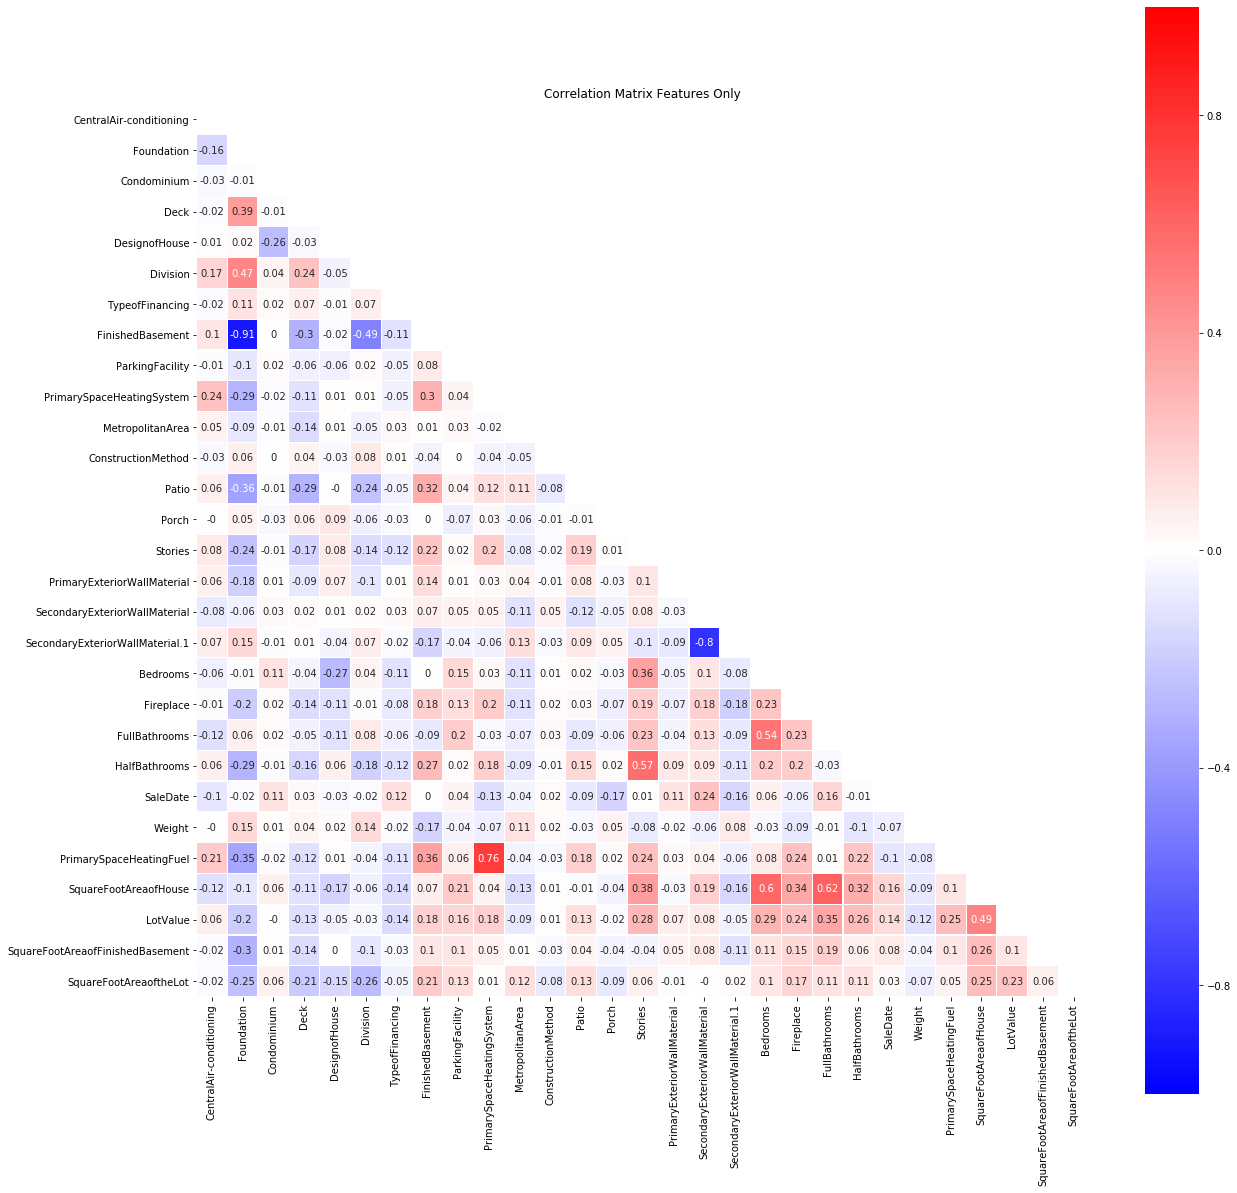

In [7]:
#Heat Map Showing correlations among the features
corr = data_features.corr().round(2)
f, ax = plt.subplots(figsize =(20, 20)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='bwr', mask=mask, annot=True,square=True, linewidths = 0.1,vmin=-1, vmax=1)
plt.title('Correlation Matrix Features Only')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Removing highly correlated features (with an absolute correlation greater than 0.6)

<u>The threshold of 0.6 is recommended by:</u> Reddy, C., Balasubramanyam, P., & Subbarayudu, M. (2013). An effective approach to resolve multicollinearity in agriculture data. International journal of research in electronics and computer engineering, 1(1), 27-30.

In [8]:
#removing highly correlated features
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.6:
            if columns[j]:
                columns[j] = False

In [9]:
#removed features
removed_columns = data_features.columns[[not columns[i] for i in range(len(columns))]]
removed_columns

Index(['FinishedBasement', 'SecondaryExteriorWallMaterial.1',
       'PrimarySpaceHeatingFuel', 'SquareFootAreaofHouse'],
      dtype='object')

In [10]:
#selected features
selected_columns = data_features.columns[columns]
selected_columns

Index(['CentralAir-conditioning', 'Foundation', 'Condominium', 'Deck',
       'DesignofHouse', 'Division', 'TypeofFinancing', 'ParkingFacility',
       'PrimarySpaceHeatingSystem', 'MetropolitanArea', 'ConstructionMethod',
       'Patio', 'Porch', 'Stories', 'PrimaryExteriorWallMaterial',
       'SecondaryExteriorWallMaterial', 'Bedrooms', 'Fireplace',
       'FullBathrooms', 'HalfBathrooms', 'SaleDate', 'Weight', 'LotValue',
       'SquareFootAreaofFinishedBasement', 'SquareFootAreaoftheLot'],
      dtype='object')

In [11]:
#concatinating the data
data=pd.concat([data['SalesPrice'],data_features[selected_columns]],axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 102737 to 149178
Data columns (total 26 columns):
SalesPrice                          5000 non-null float64
CentralAir-conditioning             5000 non-null float64
Foundation                          5000 non-null float64
Condominium                         5000 non-null float64
Deck                                5000 non-null float64
DesignofHouse                       5000 non-null float64
Division                            5000 non-null int64
TypeofFinancing                     5000 non-null float64
ParkingFacility                     5000 non-null float64
PrimarySpaceHeatingSystem           5000 non-null float64
MetropolitanArea                    5000 non-null int64
ConstructionMethod                  5000 non-null float64
Patio                               5000 non-null float64
Porch                               5000 non-null float64
Stories                             5000 non-null float64
PrimaryExteriorWallM

## Data Partition

In [13]:
X=data.drop('SalesPrice',axis=1)
X.head()

,CentralAir-conditioning,Foundation,Condominium,Deck,DesignofHouse,Division,TypeofFinancing,ParkingFacility,PrimarySpaceHeatingSystem,MetropolitanArea,...,SecondaryExteriorWallMaterial,Bedrooms,Fireplace,FullBathrooms,HalfBathrooms,SaleDate,Weight,LotValue,SquareFootAreaofFinishedBasement,SquareFootAreaoftheLot
102737,1.0,3.0,2.0,2.0,1.0,9,1.0,3.0,2.0,1,...,7.0,4.0,2.0,3.0,1.0,200601,69,94000.0,0.0,8537.0
76709,1.0,3.0,2.0,2.0,1.0,7,1.0,3.0,2.0,1,...,0.0,4.0,1.0,3.0,0.0,200408,97,34000.0,0.0,9300.0
21378,1.0,2.0,2.0,1.0,1.0,5,5.0,4.0,1.0,2,...,0.0,3.0,0.0,2.0,0.0,200008,97,22000.0,0.0,43560.0
37388,1.0,3.0,2.0,2.0,1.0,7,2.0,2.0,2.0,2,...,5.0,3.0,1.0,2.0,0.0,200112,44,10000.0,0.0,22500.0
49266,1.0,3.0,2.0,2.0,1.0,7,2.0,2.0,2.0,1,...,8.0,4.0,1.0,2.0,1.0,200207,63,15000.0,0.0,10368.0


In [14]:
y=data['SalesPrice']

In [15]:
from sklearn.model_selection import train_test_split
# 20-80% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.2,
                                                 random_state=123)

In [16]:
train_X.shape

(4000, 25)

In [17]:
train_y.shape

(4000,)

In [18]:
test_y.shape

(1000,)

In [19]:
test_X.shape

(1000, 25)

## Normalize Data

In [20]:
from sklearn import preprocessing

# Create a scaler to do the transformation
scaler = preprocessing.MinMaxScaler().fit(train_X)

In [21]:
# Transform training X
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

train_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CentralAir-conditioning,4000.0,0.082250,0.274780,0.0,0.000000,0.000000,0.000000,1.0
Foundation,4000.0,0.405583,0.307044,0.0,0.000000,0.666667,0.666667,1.0
Condominium,4000.0,0.974500,0.157658,0.0,1.000000,1.000000,1.000000,1.0
Deck,4000.0,0.755250,0.429993,0.0,1.000000,1.000000,1.000000,1.0
DesignofHouse,4000.0,0.063250,0.243443,0.0,0.000000,0.000000,0.000000,1.0
Division,4000.0,0.581406,0.265761,0.0,0.375000,0.500000,0.750000,1.0
TypeofFinancing,4000.0,0.092188,0.213007,0.0,0.000000,0.000000,0.000000,1.0
ParkingFacility,4000.0,0.420500,0.201580,0.0,0.333333,0.333333,0.666667,1.0
PrimarySpaceHeatingSystem,4000.0,0.247417,0.169437,0.0,0.000000,0.333333,0.333333,1.0
MetropolitanArea,4000.0,0.073500,0.260988,0.0,0.000000,0.000000,0.000000,1.0


In [22]:
# Transform test X
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

test_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CentralAir-conditioning,1000.0,0.092000,0.289171,0.000000,0.000000,0.000000,0.000000,1.000000
Foundation,1000.0,0.404667,0.306785,0.000000,0.000000,0.666667,0.666667,1.000000
Condominium,1000.0,0.981000,0.136593,0.000000,1.000000,1.000000,1.000000,1.000000
Deck,1000.0,0.736000,0.441020,0.000000,0.000000,1.000000,1.000000,1.000000
DesignofHouse,1000.0,0.064000,0.244875,0.000000,0.000000,0.000000,0.000000,1.000000
Division,1000.0,0.572875,0.269831,0.000000,0.375000,0.500000,0.750000,1.000000
TypeofFinancing,1000.0,0.083500,0.201726,0.000000,0.000000,0.000000,0.000000,1.000000
ParkingFacility,1000.0,0.420000,0.205691,0.000000,0.333333,0.333333,0.666667,1.000000
PrimarySpaceHeatingSystem,1000.0,0.244667,0.171759,0.000000,0.000000,0.333333,0.333333,1.000000
MetropolitanArea,1000.0,0.088000,0.283437,0.000000,0.000000,0.000000,0.000000,1.000000


## Model 1: KNN Regressor

### Model Building

In [23]:
from sklearn import neighbors

# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsRegressor(n_neighbors=5, 
                                      weights='uniform', 
                                      algorithm='auto')

In [24]:
knn5.fit(train_X_scale, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [25]:
pred_y_knn5 = knn5.predict(test_X_scale)

In [26]:
#Mean Absolute Error
metrics.mean_absolute_error(test_y, pred_y_knn5)

76756.62

In [27]:
#Mean Squared Error
metrics.mean_squared_error(test_y, pred_y_knn5)

12705194724.4

In [28]:
#R-squared
metrics.r2_score(test_y, pred_y_knn5)

0.43548835366415595

In [29]:
#Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(test_y, pred_y_knn5))

112717.32220204665

In [30]:
#Mean Absolute Percentage Error
np.mean(np.abs(pred_y_knn5 - test_y)/np.abs(test_y))

0.30485730444701914

### Model Tunning

In [31]:
#tunning the model based on Mean Absolute Error
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsRegressor(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y = knn.predict(test_X_scale)
    print("MAE is ", metrics.mean_absolute_error(test_y, pred_y),"for k =",k)

MAE is  91262.0 for k = 1
MAE is  81680.4 for k = 2
MAE is  79602.53333333334 for k = 3
MAE is  78195.8 for k = 4
MAE is  76756.62 for k = 5
MAE is  76731.26666666668 for k = 6
MAE is  76149.12857142856 for k = 7
MAE is  75530.4 for k = 8
MAE is  75326.2888888889 for k = 9
MAE is  75679.28 for k = 10
MAE is  75256.48181818181 for k = 11
MAE is  75580.625 for k = 12
MAE is  75270.8 for k = 13
MAE is  75588.17142857143 for k = 14
MAE is  75252.02 for k = 15
MAE is  75384.2125 for k = 16
MAE is  75282.60588235295 for k = 17
MAE is  75677.71666666667 for k = 18
MAE is  75425.81052631578 for k = 19
MAE is  75785.01 for k = 20


### Model Testing

We have the lowest MAE for k=11

In [32]:
knn_final = neighbors.KNeighborsRegressor(n_neighbors = 11, 
                                      weights='uniform',                                    
                                      algorithm='auto')
knn_final.fit(train_X_scale, train_y)
pred_y_knn_final = knn_final.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_knn_final))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_knn_final))
print('R-squared is',metrics.r2_score(test_y, pred_y_knn_final))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_knn_final)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_knn_final - test_y)/np.abs(test_y)))

Mean Absolute Error is 76756.62
Mean Squared Error is 12705194724.4
R-squared is 0.43548835366415595
Root Mean Squared Error is 112717.32220204665
Mean Absolute Percentage Error is 0.30485730444701914


## Model 2: Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

### Model Building

In [34]:
# Train an RF classifier
rf = RandomForestRegressor(n_estimators=5, max_features=10, random_state=123)

In [35]:
rf.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [36]:
# Show feature importance
rf.feature_importances_

array([1.97464897e-03, 8.22103288e-03, 4.02975473e-04, 3.59064837e-03,
       2.58858590e-03, 2.55119093e-02, 3.66205930e-03, 6.11035547e-02,
       4.23169227e-03, 8.91462538e-04, 8.53485269e-04, 3.53773964e-03,
       4.66561296e-03, 3.76220492e-03, 1.72804250e-02, 1.08540459e-02,
       4.53996002e-02, 1.40943776e-02, 4.42111342e-02, 1.95683216e-02,
       6.57824476e-02, 2.85598777e-02, 5.80900957e-01, 1.04842455e-02,
       3.78669550e-02])

In [37]:
# Beautify the display of feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
LotValue,0.580901
SaleDate,0.065782
ParkingFacility,0.061104
Bedrooms,0.045400
FullBathrooms,0.044211
SquareFootAreaoftheLot,0.037867
Weight,0.028560
Division,0.025512
HalfBathrooms,0.019568
PrimaryExteriorWallMaterial,0.017280


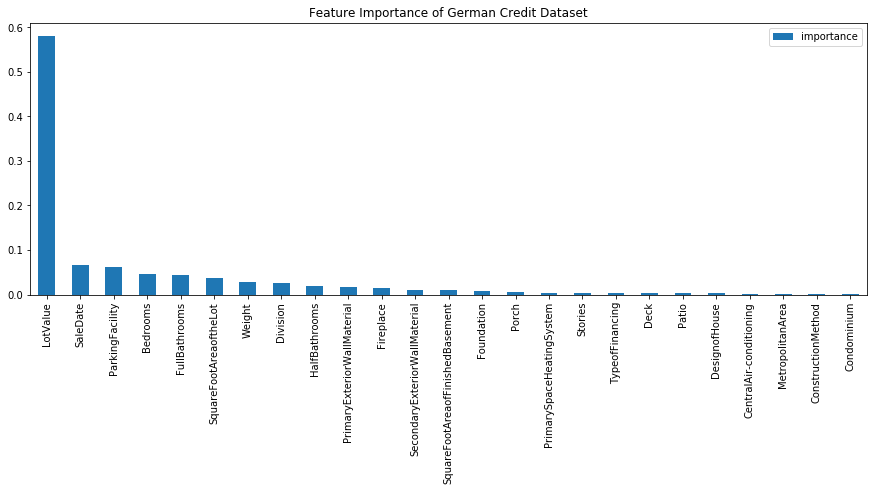

In [38]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of German Credit Dataset')

In [39]:
# Predict on test set
pred_y_rf = rf.predict(test_X)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_rf))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_rf))
print('R-squared is',metrics.r2_score(test_y, pred_y_rf))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_rf)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_rf - test_y)/np.abs(test_y)))

Mean Absolute Error is 49376.86
Mean Squared Error is 5170145704.4
R-squared is 0.770282350904711
Root Mean Squared Error is 71903.72524702735
Mean Absolute Percentage Error is 0.19345207638548034


### Model Tunning

In [40]:
parameters = {'criterion': ['mse','mae'],
              'n_estimators':[10,20,30,40,50,60,70,80,90,100],
              'random_state':[123]}

In [41]:
rf2 = RandomForestRegressor()

In [42]:
# Use a 5-fold cross-validation
grid_rf = GridSearchCV(rf2, parameters, cv=5)

In [43]:
import time
start = time.time()
print('Time Sart:'+ time.strftime("%m/%d/%Y %H:%M:%S"))

grid_rf.fit(train_X,train_y)

end = time.time()
print('Time End:'+ time.strftime("%m/%d/%Y %H:%M:%S"))
print('Execution Time (Seconds):' + str(end - start))

Time Sart:04/24/2020 14:47:53
Time End:04/24/2020 15:05:53
Execution Time (Seconds):1080.0570487976074


In [44]:
# Show best parameters
grid_rf.best_params_

{'criterion': 'mae', 'n_estimators': 100, 'random_state': 123}

### Model testing

In [46]:
# Train a new RF with best parameters
rf_final = RandomForestRegressor(criterion='mae',n_estimators=100, random_state=123)

In [47]:
rf_final.fit(train_X,train_y)
# Predict on test set
pred_y_rf_final = grid_rf.predict(test_X)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_rf_final))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_rf_final))
print('R-squared is',metrics.r2_score(test_y, pred_y_rf_final))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_rf_final)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_rf_final - test_y)/np.abs(test_y)))

Mean Absolute Error is 44484.9705
Mean Squared Error is 4253032472.90325
R-squared is 0.8110311242544297
Root Mean Squared Error is 65215.2779101895
Mean Absolute Percentage Error is 0.1747319674894066


## Model 3: ANN

### Model Building

In [62]:
from sklearn import neural_network
ann1 = neural_network.MLPRegressor(alpha=1e-5,max_iter=1000,
                                   hidden_layer_sizes=(20),
                                   random_state=1)

In [63]:
ann1.fit(train_X_scale, train_y)

C:\Users\rhak2f\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=20, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [64]:
# Predict on test set
pred_y1 = ann1.predict(test_X_scale)
pd.Series(pred_y1).describe()

count     1000.000000
mean     68514.077159
std       9975.271744
min      43137.578372
25%      60855.371314
50%      68185.612412
75%      75547.078255
max      99597.403401
dtype: float64

### Model Tunning

In [69]:
parameters = {'alpha': [1e-5],
              'batch_size':[32,64,128],
              'solver':['lbfgs'],
              'learning_rate':['constant', 'adaptive'],
              'hidden_layer_sizes':[2,3,4,5,6,7,8,9,10,(1, 1),(2, 2),(3, 3),(1, 1, 1),(2, 2, 2),(3, 3, 3)],
              'random_state':[123]}

In [70]:
ann2 = neural_network.MLPRegressor(max_iter=1000)

In [71]:
# Use a 5-fold cross-validation
grid_ann = GridSearchCV(ann2, parameters, cv=5)

In [72]:
grid_ann.fit(train_X,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=1000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state...
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05], 'batch_size': [32, 64, 128],
                         'hidden_layer_sizes

In [75]:
# Show best parameters
grid_ann.best_params_

{'alpha': 1e-05,
 'batch_size': 32,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'random_state': 123,
 'solver': 'lbfgs'}

### Model Testing

In [78]:
# Train a new RF with best parameters
ann_final = neural_network.MLPRegressor(max_iter=1000,alpha= 1e-05,
 batch_size= 32,
 hidden_layer_sizes= 10,
 learning_rate= 'constant',
 random_state= 123,
 solver= 'lbfgs')
ann_final.fit(train_X_scale, train_y)

MLPRegressor(activation='relu', alpha=1e-05, batch_size=32, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=10, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=123, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [79]:
pred_y_ann_final = ann_final.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_ann_final))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_ann_final))
print('R-squared is',metrics.r2_score(test_y, pred_y_ann_final))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_ann_final)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_ann_final - test_y)/np.abs(test_y)))

Mean Absolute Error is 48500.967963298186
Mean Squared Error is 4855820471.093498
R-squared is 0.784248311977152
Root Mean Squared Error is 69683.71740294498
Mean Absolute Percentage Error is 0.19272588438627988


# Summary of all Models

In [80]:
MAE = [metrics.mean_absolute_error(test_y, pred_y_knn_final),
       metrics.mean_absolute_error(test_y, pred_y_rf_final),
       metrics.mean_absolute_error(test_y, pred_y_ann_final)]

MSE=[metrics.mean_squared_error(test_y, pred_y_knn_final),
    metrics.mean_squared_error(test_y, pred_y_rf_final),
    metrics.mean_squared_error(test_y, pred_y_ann_final)]

RSquared=[metrics.r2_score(test_y, pred_y_knn_final),
         metrics.r2_score(test_y, pred_y_rf_final),
         metrics.r2_score(test_y, pred_y_ann_final)]

RMSE=[np.sqrt(metrics.mean_squared_error(test_y, pred_y_knn_final)),
     np.sqrt(metrics.mean_squared_error(test_y, pred_y_rf_final)),
     np.sqrt(metrics.mean_squared_error(test_y, pred_y_ann_final))]

MAPE=[np.mean(np.abs(pred_y_knn_final - test_y)/np.abs(test_y)),
     np.mean(np.abs(pred_y_rf_final - test_y)/np.abs(test_y)),
     np.mean(np.abs(pred_y_ann_final - test_y)/np.abs(test_y))]

In [81]:
pd.DataFrame({'MAE':MAE, 'MSE':MSE, 'RSquared':RSquared, 'RMSE':RMSE,'MAPE': MAPE},
             index = ['k-NN',
                      'Random Forest',
                      'ANN'])

,MAE,MSE,RSquared,RMSE,MAPE
k-NN,75256.481818,1.209208e+10,0.462730,109964.001495,0.302772
Random Forest,44484.970500,4.253032e+09,0.811031,65215.277910,0.174732
ANN,48500.967963,4.855820e+09,0.784248,69683.717403,0.192726


The best model so far is the Random Forest

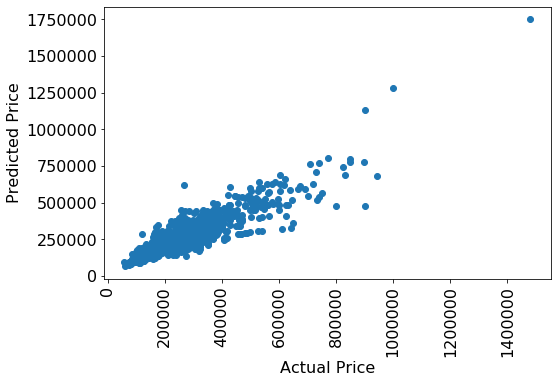

In [94]:
plt.figure(figsize=(8,5))
plt.scatter(test_y, pred_y_rf_final)
plt.xlabel('Actual Price',fontsize=16)
plt.ylabel('Predicted Price',fontsize=16)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.show()